In [2]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage
import os

# This it the language model we'll use. We'll talk about what we're doing below in the next section
chat = ChatOpenAI(temperature=.7, openai_api_key=os.getenv("GPT4_API_KEY"))

/Users/uzair/miniconda3/envs/langchain/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [3]:
chat(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out what to eat in one short sentence"),
        HumanMessage(content="I like tomatoes, what should I eat?")
    ]
)

/Users/uzair/miniconda3/envs/langchain/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


AIMessage(content='You should try a caprese salad with fresh tomatoes, mozzarella, basil, and balsamic glaze.')

In [4]:
chat(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out where to travel in one short sentence"),
        HumanMessage(content="I like the beaches where should I go?"),
        AIMessage(content="You should go to Nice, France"),
        HumanMessage(content="What else should I do when I'm there?")
    ]
)

AIMessage(content='Explore the charming old town, enjoy the Mediterranean cuisine, and visit the beautiful Promenade des Anglais in Nice, France.')

### Documents

In [5]:
from langchain.schema import Document

In [7]:
with open("./sample.txt","r") as f:
    data = f.read()

In [8]:
Document(page_content=data,
         metadata={
             'my_document_id' : 234234,
             'my_document_source' : "The LangChain Papers",
             'my_document_create_time' : 1680013019
         })

Document(page_content='Strangers have come to the remote area of the Two Rivers; strangers the likes of which Rand, Mat and Perrin have never seen—a Lady named Moiraine like out of a gleeman’s tale, and her Warder, Lan, and then the gleeman to go with it. Fireworks, a gleeman and a Lady, all in time for Winternight Festival—not even the presence of a dark figure haunting the woods, a figure the wind does not seem to touch, can scare away their excitement.\n\nBut then the dark rider returns, bringing with him Trollocs—the monstrous soldiers of the Dark One, a blending of man and animal—and Winternight is torn apart in blood and fire. Only the work of the mysterious and powerful Aes Sedai, Moiraine, pushes back the Shadowspawn onslaught. Worse still, it becomes apparent that the Trolloc attack had a focus—Rand, Mat and Perrin. Not knowing why the Shadow seeks them, Moiraine warns them—they must leave, or the Shadow would return, and next time their village may not be so lucky.\n\nFleeing

# Retrievers

Easy way to compline the Document with LLM

Retrievers are a key component in information retrieval and question-answering systems. They help to identify the most relevant documents or text passages in response to a query.

In the context of Langchain, a range of retrievers is used to accomplish this task, each with its unique approach to finding relevant information.

### RAG

Retrieval Augmented Generation (RAG). In this process, external data is retrieved and then passed to the LLM when doing the generation step.

![](<attachment:Screenshot 2024-02-25 at 1.35.54 PM.png>)
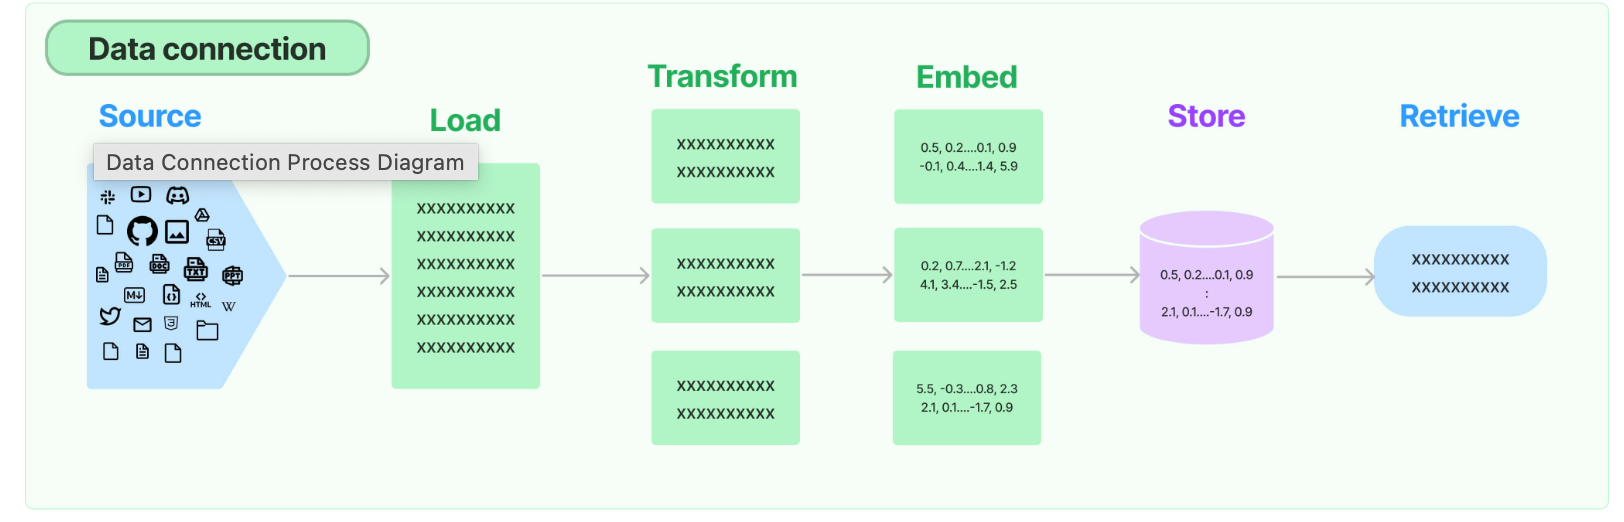

In [43]:
pdf_path ="/Users/uzair/Downloads/alchemist.pdf"

In [44]:
from unstructured.partition.pdf import partition_pdf
from unstructured.staging.base import elements_to_json

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [19]:
# This is a long document we can split up.
with open('./sample.txt') as f:
    sample_data = f.read()
    
print (f"You have {len([sample_data])} document")

You have 1 document


In [20]:
from langchain.text_splitter import RecursiveCharacterTextSplitter


In [21]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 150,
    chunk_overlap  = 20,
)

texts = text_splitter.create_documents([sample_data])

In [22]:
print (f"You have {len(texts)} documents")


You have 16 documents


In [23]:
print ("Preview:")
print (texts[0].page_content, "\n")
print (texts[1].page_content)

Preview:
Strangers have come to the remote area of the Two Rivers; strangers the likes of which Rand, Mat and Perrin have never seen—a Lady named Moiraine like 

named Moiraine like out of a gleeman’s tale, and her Warder, Lan, and then the gleeman to go with it. Fireworks, a gleeman and a Lady, all in time


In [24]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

loader = TextLoader('./sample.txt')
documents = loader.load()

In [26]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
embeddings = OpenAIEmbeddings(openai_api_key=os.getenv("GPT4_API_KEY"))
db = FAISS.from_documents(texts, embeddings)


In [35]:
embedding_list = embeddings.embed_documents([text.page_content for text in texts])


In [36]:
embedding_list

[[-0.0014610856422305485,
  -0.01825567721975309,
  -0.01627716062530334,
  0.010517010549120258,
  0.0038728416274829637,
  0.05450042380634348,
  -0.041310310693151615,
  -0.024499934362016706,
  -0.027488757144045455,
  -0.02510331032324377,
  0.0013119953323457658,
  -0.009450575412166791,
  -0.005097136873415006,
  -0.011092323898305256,
  0.014214451538114483,
  0.022830121401191006,
  0.01843809351125234,
  0.00825785293308853,
  0.0006182865521808685,
  -0.01133788479218949,
  -0.003122127872639872,
  0.015617654783379231,
  0.0008699862006569667,
  -0.013077857077088102,
  0.0035237949622500516,
  0.011871101429343642,
  0.03044951731403214,
  -0.05820488231099338,
  0.0029800534485962516,
  -0.0036553452082859605,
  0.00026902041496073203,
  -0.0101100812540909,
  -0.016613930596259784,
  -0.026997635356276986,
  -0.049196314458908534,
  -0.001238327134029689,
  0.004981372545144696,
  -0.011429092937939119,
  0.007829875747705039,
  -0.022493353292879728,
  0.008068420057256

In [37]:
len(embedding_list)

16

In [27]:
retriever = db.as_retriever()


In [28]:
retriever

VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x2a487f100>)

In [38]:
docs = retriever.get_relevant_documents("who is moraine?")


In [42]:
docs

[Document(page_content='Winternight is torn apart in blood and fire. Only the work of the mysterious and powerful Aes Sedai, Moiraine, pushes back the Shadowspawn onslaught.'),
 Document(page_content='them, Moiraine warns them—they must leave, or the Shadow would return, and next time their village may not be so lucky.'),
 Document(page_content='named Moiraine like out of a gleeman’s tale, and her Warder, Lan, and then the gleeman to go with it. Fireworks, a gleeman and a Lady, all in time'),
 Document(page_content='Fleeing the Two Rivers with Shadowspawn hard on their heels, the boys have no choice but to trust Moiraine as they seek the safety of the White Tower')]

In [41]:
print("\n\n".join([x.page_content[:200] for x in docs[:2]]))


Winternight is torn apart in blood and fire. Only the work of the mysterious and powerful Aes Sedai, Moiraine, pushes back the Shadowspawn onslaught.

them, Moiraine warns them—they must leave, or the Shadow would return, and next time their village may not be so lucky.


## Interact with PDF

In [83]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("/Users/uzair/Downloads/alchemist.pdf")
pages = loader.load_and_split()

In [58]:
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings

faiss_index = FAISS.from_documents(pages, OpenAIEmbeddings())
docs = faiss_index.similarity_search("who is alchemist", k=5)


In [59]:
docs

[Document(page_content='THE  \nALCHEMIST', metadata={'source': '/Users/uzair/Downloads/alchemist.pdf', 'page': 2}),
 Document(page_content='“The Alchemist  is like a modern -day The Little Prince.  A supreme \nand simple book.”  \n—Milorad Pavic  (Serbia)  \n \n“Among Latin American  writers, only Columbia’s Gabriel Garcia \nMarquez is more widely read than Brazil’s Paulo Coelho.”  \n—The Economist', metadata={'source': '/Users/uzair/Downloads/alchemist.pdf', 'page': 151}),
 Document(page_content='“A remarkable tale about the most magical of all journeys: the \nquest to fulfill one’s destiny. I recommend The Alchemist  to anyone \nwho is passionately committed to claiming the life of their dreams —\ntoday.”  \n—Anthony Robbins, author of  \nAwaken the Giant Withi n \n \n“An entrepreneurial tale of universal wisdom we can apply to \nthe business of our own lives.”  \n—Spencer Johnson, M.D., author of  \nWho Moved My Cheese  \n \n“An adventure story full of magic and wisdom.”  \n—Rudolfo

Databases to store vectors. Most popular ones are Pinecone & Weaviate.

## Memory

Helping LLMs remember information.

Memory is a bit of a loose term. It could be as simple as remembering information you've chatted about in the past or more complicated information retrieval.

We'll keep it towards the Chat Message use case. This would be used for chat bots.

In [62]:
from langchain.memory import ChatMessageHistory
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI(temperature=0, openai_api_key=os.getenv("GPT4_API_KEY"))

history = ChatMessageHistory()

history.add_ai_message("hi!")

history.add_user_message("what is the capital of france?")

In [65]:
ai_response = chat(history.messages)
ai_response

AIMessage(content='The capital of France is Paris.')

In [66]:
history.add_ai_message(ai_response.content)
history.messages

[AIMessage(content='hi!'),
 HumanMessage(content='what is the capital of france?'),
 AIMessage(content='The capital of France is Paris.')]

## Chains

Combining different LLM calls and action automatically

Ex: Summary #1, Summary #2, Summary #3 > Final Summary

#### Simple Sequential Chains
Easy chains where you can use the output of an LLM as an input into another. Good for breaking up tasks (and keeping your LLM focused)

In [67]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chains import SimpleSequentialChain

In [68]:
llm = ChatOpenAI(temperature=0, openai_api_key=os.getenv("GPT4_API_KEY"))


In [69]:
template = """Your job is to come up with a classic dish from the area that the users suggests.
% USER LOCATION
{user_location}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_location"], template=template)

# Holds my 'location' chain
location_chain = LLMChain(llm=llm, prompt=prompt_template)

In [70]:
template = """Given a meal, give a short and simple recipe on how to make that dish at home.
% MEAL
{user_meal}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_meal"], template=template)

# Holds my 'meal' chain
meal_chain = LLMChain(llm=llm, prompt=prompt_template)

In [71]:
overall_chain = SimpleSequentialChain(chains=[location_chain, meal_chain], verbose=True)


In [72]:
review = overall_chain.run("Rome")


/Users/uzair/miniconda3/envs/langchain/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new SimpleSequentialChain chain...
One classic dish from Rome is Cacio e Pepe, a simple yet delicious pasta dish made with Pecorino Romano cheese, black pepper, and spaghetti. It's a staple in Roman cuisine and is loved for its creamy, cheesy sauce and bold peppery flavor.
To make Cacio e Pepe at home, cook spaghetti according to package instructions. In a separate pan, toast black pepper until fragrant. Reserve some pasta water, then drain spaghetti and add to the pan with pepper. Toss in grated Pecorino Romano cheese and a splash of pasta water, stirring until creamy. Serve hot and enjoy!

> Finished chain.


Other Way

In [80]:
custom_template = "You are an experienced coder. state the concept of {concept} in {programming_language} and code it"

In [81]:
dynamic_prompt  = PromptTemplate(
    input_variables = ["concept","programming_language"],
    template=custom_template
)
print(dynamic_prompt)

input_variables=['concept', 'programming_language'] template='You are an experienced coder. state the concept of {concept} in {programming_language} and code it'


In [82]:
output = llm.invoke(dynamic_prompt.format(concept = "recursion",programming_language="python"))
print(output.content)

Recursion is a programming technique where a function calls itself in order to solve a problem. In Python, recursion can be used to solve problems that can be broken down into smaller, similar subproblems.

Here is an example of a recursive function in Python that calculates the factorial of a number:

```python
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

# Test the function
print(factorial(5))  # Output: 120
```

In this example, the `factorial` function calls itself with a smaller input (`n-1`) until it reaches the base case (`n == 0`), at which point it returns 1. The function then "unwinds" the recursive calls, multiplying the result of each call by `n` until it reaches the original input.


####  Summarization Chain

Easily run through long numerous documents and get a summary

In [84]:
from langchain.chains.summarize import load_summarize_chain
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

# loader = TextLoader('data/PaulGrahamEssays/disc.txt')
# documents = loader.load()

# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(pages)

# There is a lot of complexity hidden in this one line. I encourage you to check out the video above for more detail
chain = load_summarize_chain(llm, chain_type="map_reduce", verbose=True)
chain.run(texts)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"THE  
ALCHEMIST"


CONCISE SUMMARY:
Prompt after formatting:
Write a concise summary of the following:


"PAULO COELHO  
TRANSLATED BY ALAN R. CLARKE"


CONCISE SUMMARY:
Prompt after formatting:
Write a concise summary of the following:


"Contents  
 
 
  
INTRODUCTION  
  
I remember receiving a letter from the 
American publisher Harper Collins…  
 
 
  
PROLOGUE  
  
The alchemist picked up a book that someone 
in the…  
 
 
  
ONE 
  
The boy’s name was Santiago. Dusk was 
falling as the…"


CONCISE SUMMARY:
Prompt after formatting:
Write a concise summary of the following:


"TWO 
  
The boy had been working for the crystal 
merchant for…  
 
 
 
 
  
EPILOGUE  
  
The boy reached the small, abandoned 
church just as night…  
 
 
  
ABOUT THE AUTHOR  
 
 
  
INTERNATIONAL ACCLAIM  
 
 
  
BOOKS BY PAULO COELHO"


CONCISE SUMMAR

'"The Alchemist" by Paulo Coelho follows the journey of a young shepherd named Santiago as he seeks his Personal Legend, learning valuable lessons about following his dreams and listening to his heart. The story emphasizes the importance of pursuing one\'s personal calling, overcoming obstacles, and finding fulfillment in life. Santiago encounters challenges, meets various characters, and gains insights into the interconnectedness of the world, ultimately realizing the power of following his heart and pursuing his dreams.'

In [109]:
from langchain.document_loaders import UnstructuredFileLoader
# loader = UnstructuredFileLoader("/Users/uzair/Downloads/alchemist.pdf",mode="elements")
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("/Users/uzair/Downloads/alchemist.pdf")
document = loader.load_and_split()



In [110]:
chain= load_summarize_chain(llm, chain_type="map_reduce",verbose=True)

In [111]:
chain.run(document)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"THE  
ALCHEMIST"


CONCISE SUMMARY:
Prompt after formatting:
Write a concise summary of the following:


"PAULO COELHO  
TRANSLATED BY ALAN R. CLARKE"


CONCISE SUMMARY:
Prompt after formatting:
Write a concise summary of the following:


"Contents  
 
 
  
INTRODUCTION  
  
I remember receiving a letter from the 
American publisher Harper Collins…  
 
 
  
PROLOGUE  
  
The alchemist picked up a book that someone 
in the…  
 
 
  
ONE 
  
The boy’s name was Santiago. Dusk was 
falling as the…"


CONCISE SUMMARY:
Prompt after formatting:
Write a concise summary of the following:


"TWO 
  
The boy had been working for the crystal 
merchant for…  
 
 
 
 
  
EPILOGUE  
  
The boy reached the small, abandoned 
church just as night…  
 
 
  
ABOUT THE AUTHOR  
 
 
  
INTERNATIONAL ACCLAIM  
 
 
  
BOOKS BY PAULO COELHO"


CONCISE SUMMAR

'"The Alchemist" by Paulo Coelho follows a young shepherd named Santiago on a journey to find hidden treasure in Egypt. Along the way, he learns valuable lessons about following his dreams, listening to his heart, and trusting in fate. The story emphasizes the importance of pursuing one\'s Personal Legend and discovering that true treasure lies within oneself."'